# Multi-Class Prediction of Obesity Risk

<b>Hedefimiz:</b> Bu yarışmanın amacı, kardiyovasküler hastalıkla ilişkili olan obezite riskini bireylerde tahmin etmek için çeşitli faktörleri kullanmaktır. İyi şanslar!

<img src="https://pan-int.org/wp-content/uploads/Blog_ob_physician_image1-BMI.webp">

<a href="https://www.kaggle.com/competitions/playground-series-s4e2/data">Dataya Buradan Erişebilirsiniz</a>

### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(20758, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df["family_history_with_overweight"].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [8]:
df["FAVC"].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

In [9]:
df["SMOKE"].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

In [10]:
df["SCC"].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

In [11]:
df["CAEC"].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [12]:
df["CALC"].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [13]:
df["MTRANS"].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [14]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

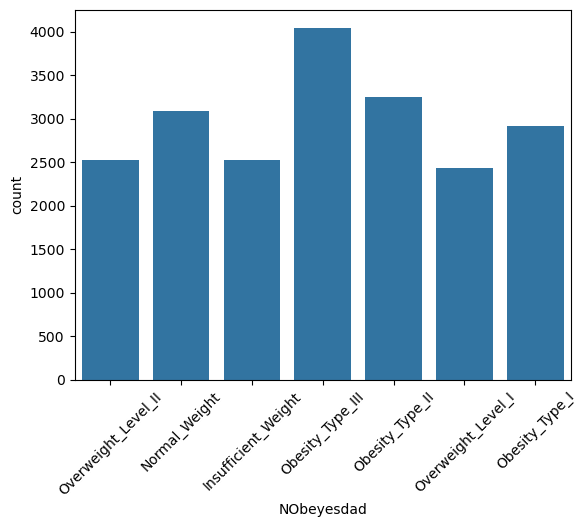

In [15]:
sns.countplot(x=df["NObeyesdad"])
plt.xticks(rotation=45);

### Feature Importance

In [16]:
d1={"Male":1,"Female":0}

In [17]:
df["Gender"]=df["Gender"].map(d1)

In [18]:
d2={"yes":1,"no":0}

In [19]:
df[["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]] = df[["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]].apply(lambda x: x.map(d2))

In [20]:
d3={"no":0,"Always":1,"Frequently":2,"Sometimes":3}

In [21]:
df["CAEC"]=df["CAEC"].map(d3)

In [22]:
d4={"no":0,"Frequently":1,"Sometimes":2}

In [23]:
df["CALC"]=df["CALC"].map(d4)

In [24]:
d5={"Public_Transportation":0,"Automobile":1,"Walking":2,"Motorbike":3,"Bike":4}

In [25]:
df["MTRANS"]=df["MTRANS"].map(d5)

In [26]:
d6={"Obesity_Type_III":0,"Obesity_Type_II":1,"Normal_Weight":2,"Obesity_Type_I":3,"Insufficient_Weight":4,"Overweight_Level_I":5,"Overweight_Level_II":6}

In [27]:
df["NObeyesdad"]=df["NObeyesdad"].map(d6)

In [28]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,3,0,2.763573,0,0.000000,0.976473,2,0,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,2
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,3,0,1.910378,0,0.866045,1.673584,0,0,4
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,3,0,1.674061,0,1.467863,0.780199,2,0,0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,3,0,1.979848,0,1.967973,0.931721,2,0,6


### Modelling

In [29]:
x=df.drop(["id","NObeyesdad"],axis=1)
y=df["NObeyesdad"]

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Tüm sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression(max_iter=1000)
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        
        # average parametresini buraya ekliyorum
        precision.append(precision_score(y_test, y_pred, average='macro'))  # veya 'weighted'
        recall.append(recall_score(y_test, y_pred, average='macro'))  # veya 'weighted'
        f1.append(f1_score(y_test, y_pred, average='macro'))  # veya 'weighted'

    # Sonuçları result tablosuna ekliyorum
    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1
        
    return result.sort_values('Accuracy', ascending=False)

In [31]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
Gradient Boosting,0.905347,0.895401,0.894671,0.895005
XGBoost,0.901734,0.891768,0.891053,0.891381
Random Forest,0.896435,0.885687,0.884359,0.884932
MLP,0.859586,0.844838,0.846322,0.844555
Decision Tree,0.847062,0.831794,0.831830,0.831710
Logistic Regression,0.841281,0.823001,0.824901,0.823318
KNN,0.839836,0.823460,0.824982,0.823941
SVC,0.715077,0.711131,0.693639,0.690953


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
gb = GradientBoostingClassifier()

In [36]:
mod=gb.fit(x_train,y_train)

In [37]:
thmn=gb.predict(x_test)

In [38]:
accuracy_score(y_test, thmn)

0.9053468208092486

<Axes: >

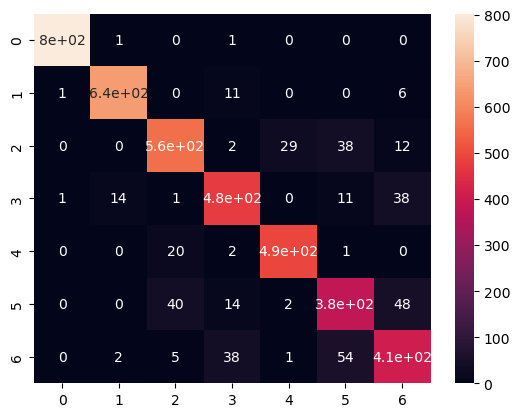

In [39]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [40]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       0.97      0.97      0.97       658
           2       0.89      0.87      0.88       641
           3       0.87      0.88      0.88       540
           4       0.94      0.96      0.95       515
           5       0.79      0.79      0.79       484
           6       0.80      0.80      0.80       510

    accuracy                           0.91      4152
   macro avg       0.89      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



In [41]:
import pickle

In [42]:
with open('obesity.pkl', 'wb') as file:
    pickle.dump(gb, file)

Kaggle daki test dosyamızı yükleyip tahmin ettireceğiz.

In [43]:
test=pd.read_csv("test.csv")

In [44]:
dosya=pd.DataFrame()

In [45]:
dosya["id"]=test["id"]

In [46]:
test=test.drop(["id"],axis=1)

In [47]:
test["Gender"]=test["Gender"].map(d1)

In [48]:
test[["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]] = test[["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]].apply(lambda x: x.map(d2))

In [49]:
test["CAEC"]=test["CAEC"].map(d3)

In [50]:
test["CALC"]=test["CALC"].map(d4)

In [51]:
test["MTRANS"]=test["MTRANS"].map(d5)

In [52]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              2
MTRANS                            0
dtype: int64

In [53]:
test["CALC"]=test["CALC"].fillna(0)

In [54]:
dosya["NObeyesdad"]=gb.predict(test)

In [57]:
dt={0:"Obesity_Type_III",1:"Obesity_Type_II",2:"Normal_Weight",3:"Obesity_Type_I",4:"Insufficient_Weight",5:"Overweight_Level_I",6:"Overweight_Level_II"}

In [58]:
dosya["NObeyesdad"]=dosya["NObeyesdad"].map(dt)

In [59]:
dosya

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [60]:
dosya.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [64]:
x=df.drop(["id","NObeyesdad"],axis=1)
y=df["NObeyesdad"]

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
from sklearn.preprocessing import normalize, scale

In [67]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(7,activation="softmax")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam 

In [68]:
x=scale(x) # hepsini aynı birime getirdik

In [69]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1)

Epoch 1/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6015 - loss: 0.9913 - val_accuracy: 0.8449 - val_loss: 0.4427
Epoch 2/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.4178 - val_accuracy: 0.8569 - val_loss: 0.4026
Epoch 3/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3951 - val_accuracy: 0.8613 - val_loss: 0.3924
Epoch 4/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8644 - loss: 0.3742 - val_accuracy: 0.8673 - val_loss: 0.3845
Epoch 5/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8707 - loss: 0.3573 - val_accuracy: 0.8622 - val_loss: 0.3885
Epoch 6/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.3387 - val_accuracy: 0.8767 - val_loss: 0.3644
Epoch 7/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3464 - val_accuracy: 0.8724 - val_loss: 0.3705
Epoch 8/75
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8810 - loss: 0.3415 - val_accuracy: 0.

In [70]:
dosya["NObeyesdad"]=model.predict(test)

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [71]:
dosya["NObeyesdad"]=dosya["NObeyesdad"].map(dt)

In [72]:
dosya

,id,NObeyesdad
0,20758,Obesity_Type_III
1,20759,Obesity_Type_III
2,20760,Obesity_Type_III
3,20761,Obesity_Type_III
4,20762,Obesity_Type_III
...,...,...
13835,34593,Obesity_Type_III
13836,34594,Obesity_Type_III
13837,34595,Obesity_Type_III
13838,34596,Obesity_Type_III


In [73]:
dosya.to_csv("tahmin2.csv",index=False)

Sonuc olarak modelimizi hem ML hem de DL kullanarak eğittik ve Kaggle da test ettirdik. Ardından da sreamlit uygulaması olusturduk.